<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

## Tobacco Retail Dealer and Electronic Cigarette Retail Dealer Caps by Community District
## Description
This dataset shows the maximum number (cap) of Tobacco Retail Dealer and Electronic Cigarette Retail Dealer licenses allowed in each Community District, as well as the current number of active Tobacco Retail Dealer and Electronic Cigarette Retail Dealer licenses.

The City set caps (limits) on the number of Tobacco Retail Dealer and Electronic Cigarette Retail Dealer licenses in each Community District established under Chapter 69 of the New York City Charter. The caps are 50 percent of the number of active Tobacco Retail Dealer licenses on February 24, 2018 and 50 percent of the number of licenses issued for Electronic Cigarette Retail Dealer as of August 23, 2018. The cap for Tobacco Retail Dealers excludes pharmacies whose licenses permanently expire before January 1, 2019 when pharmacies and businesses that contain pharmacies can no longer sell cigarettes or other tobacco products in New York City.
The number of active licenses are grouped by borough and community district number. Each row of data represents one Community District's license cap and the number of active licenses at the time of the dataset's publication.
Businesses interested in applying for these licenses may use this dataset to determine if licenses are available in their Community District. Even if licenses are not available, businesses may be able to apply if they meet limited exceptions to the cap. Visit nyc.gov/dca for license requirements.

## Data Dictionary
**- Borough** = Borough where the business is located.

**- Community Board** = Community District number where the business is located.

**- COMMUNITY DISTRICT NAME** = Descriptive name of the Community District.

**- Tobacco Retail Dealer Cap** = Maximum number of Tobacco Retail Dealer licenses allowed in the Community District.

**- Active Tobacco Retail Dealer Licenses** = Number of active Tobacco Retail Dealer licenses in the Community District as of the last run date of the report, minus all Tobacco Retail Dealer licenses held by pharmacies.

**- TRD Available Under Cap** = Number of new TRD licenses that can be issued in the Community District

**- Electronic Cigarette Retail Dealer Cap** = Maximum number of Electronic Cigarette Retail Dealer licenses assigned to the Community District.

**- Active Electronic Cigarette Retail Dealer Licenses** = Number of active Electronic Cigarette Retail Dealer licenses in the Community District as of the last run date of the report.

**- ECD Available Under Cap** = Number of new ECD licenses that can be issued in the Community District

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Display top 7 rows of the dataframe in your notebook

In [2]:
#load data
df = pd.read_csv('https://data.cityofnewyork.us/api/views/ymyu-3dbp/rows.csv?accessType=DOWNLOAD')
df.head(7)

,Borough,Community Board,COMMUNITY DISTRICT NAME,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap
0,Bronx,201,Bronx 1,63,105,0,13,26,0
1,Bronx,202,Bronx 2,36,68,0,5,10,0
2,Bronx,203,Bronx 3,45,81,0,8,16,0
3,Bronx,204,Bronx 4,88,150,0,9,18,0
4,Bronx,205,Bronx 5,68,124,0,14,28,0
5,Bronx,206,Bronx 6,58,100,0,7,14,0
6,Bronx,207,Bronx 7,63,122,0,18,36,0


## Count number of null values (if any) for each column

In [3]:
df.isnull().sum()

Borough                                               0
Community Board                                       0
COMMUNITY DISTRICT NAME                               0
Tobacco Retail Dealer Cap                             0
Active Tobacco Retail Dealer Licenses                 0
TRD Available Under Cap                               0
Electronic Cigarette Retail Dealer Cap                0
Active Electronic Cigarette Retail Dealer Licenses    0
ECD Available Under Cap                               0
dtype: int64

## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [4]:
reducted_df = df[['Tobacco Retail Dealer Cap', 'Active Tobacco Retail Dealer Licenses']]
reducted_df.head()

,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses
0,63,105
1,36,68
2,45,81
3,88,150
4,68,124


## Display the average, median, and standard deviation of each of your numerical columns

In [5]:
reducted_df.describe()

,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses
count,59.000000,59.000000
mean,65.745763,116.694915
std,24.261217,42.035393
min,28.000000,52.000000
25%,48.500000,88.500000
50%,62.000000,109.000000
75%,76.000000,140.500000
max,155.000000,285.000000


## Plot two of the numerical columns one against the other in a scatter plot

<Figure size 432x288 with 0 Axes>

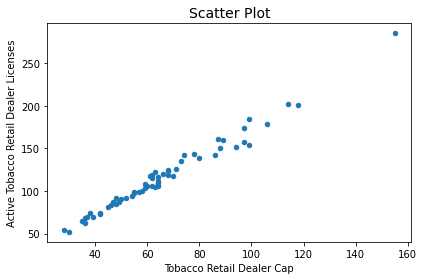

In [6]:
plt.figure()
reducted_df.plot.scatter(x='Tobacco Retail Dealer Cap', y='Active Tobacco Retail Dealer Licenses')
plt.title('Scatter Plot', size=14)
plt.tight_layout()
plt.show()

## Plot the data distribution of all your numerical columns in histogram and boxplot

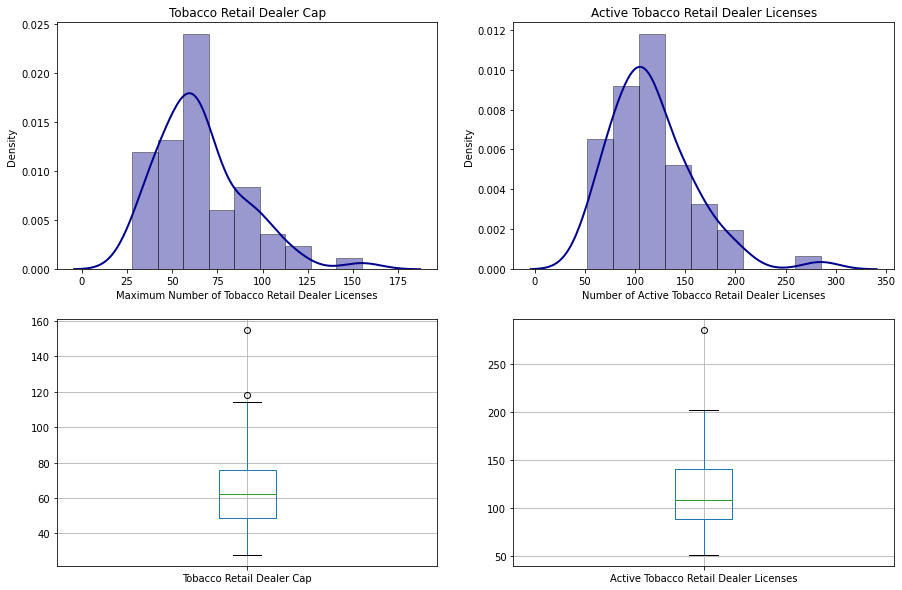

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(reducted_df['Tobacco Retail Dealer Cap'], hist=True, kde=True, color='darkblue',
             hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})
plt.title('Tobacco Retail Dealer Cap')
plt.xlabel('Maximum Number of Tobacco Retail Dealer Licenses')

plt.subplot(2,2,2)
sns.distplot(reducted_df['Active Tobacco Retail Dealer Licenses'], hist=True, kde=True, color='darkblue',
             hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})
plt.title('Active Tobacco Retail Dealer Licenses')
plt.xlabel('Number of Active Tobacco Retail Dealer Licenses')

plt.subplot(2,2,3)
reducted_df.boxplot(column='Tobacco Retail Dealer Cap')

plt.subplot(2,2,4)
reducted_df.boxplot(column='Active Tobacco Retail Dealer Licenses')

plt.show()

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [8]:
reducted_df['Raised_power_value'] = reducted_df['Tobacco Retail Dealer Cap']**2
reducted_df.head()

<ipython-input-8-00dc5dae05b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reducted_df['Raised_power_value'] = reducted_df['Tobacco Retail Dealer Cap']**2


,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,Raised_power_value
0,63,105,3969
1,36,68,1296
2,45,81,2025
3,88,150,7744
4,68,124,4624


# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

In [50]:
! curl https://s3.amazonaws.com/tripdata/201709-citibike-tripdata.csv.zip >> 201709-citibike-tripdata.csv.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 62.8M    0  1679    0     0   1267      0 14:26:33  0:00:01 14:26:32  1267
  0 62.8M    0  271k    0     0   125k      0  0:08:31  0:00:02  0:08:29  125k
  1 62.8M    1  815k    0     0   258k      0  0:04:08  0:00:03  0:04:05  258k
  1 62.8M    1 1240k    0     0   291k      0  0:03:40  0:00:04  0:03:36  291k
  2 62.8M    2 1733k    0     0   335k      0  0:03:11  0:00:05  0:03:06  350k
  3 62.8M    3 2225k    0     0   361k      0  0:02:58  0:00:06  0:02:52  459k
  4 62.8M    4 2736k    0     0   382k      0  0:02:48  0:00:07  0:02:41  493k
  5 62.8M    5 3263k    0     0   400k      0  0:02:40  0:00:08  0:02:32  489k
  5 62.8M    5 3790k    0     0   414k      0  0:02

In [59]:
from zipfile import ZipFile
zf = ZipFile('C:/Users/Chrome/gitklasa_deschietri/module-2/201709-citibike-tripdata.csv.zip', 'r')
zf.extractall('C:/Users/Chrome/gitklasa_deschietri/module-2/')
zf.close()

In [9]:
# load data
data = pd.read_csv('201709-citibike-tripdata.csv')
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1


## Count the number of missing values of each column

In [10]:
data.isnull().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 207468
gender                          0
dtype: int64

## Who rides citibikes? Show ridership distribution by gender, user type, and age
Process the data and plot your answers

In [11]:
# gender value counting
data['gender'].value_counts()

1    1218524
2     444132
0     215442
Name: gender, dtype: int64

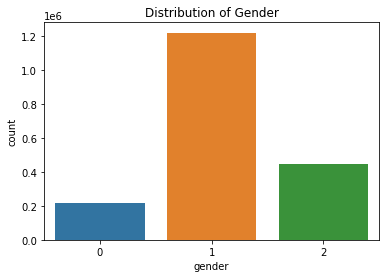

In [12]:
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')
plt.show()

>The ridership was dominated by male (1) rather than female (2) and unknown (0)

In [13]:
# user type value counting
data['usertype'].value_counts()

Subscriber    1643109
Customer       234989
Name: usertype, dtype: int64

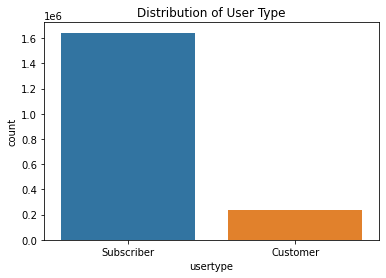

In [14]:
sns.countplot(x='usertype', data=data)
plt.title('Distribution of User Type')
plt.show()

>The ridership was mostly Subsriber (annual member) with 1.643.109 users, while the rest was Customer (24-hour pass or 3-day pass user) with 234.989 users

In [15]:
# add age column from bith year column
import datetime
now = datetime.datetime.now()
this_year = now.year

data['age'] = this_year-data['birth year']
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1,28.0
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1,33.0
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1,52.0
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1,28.0
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1,34.0


In [16]:
# summary statistics of age
round(data['age'].describe(),0)

count    1670630.0
mean          41.0
std           12.0
min           20.0
25%           32.0
50%           39.0
75%           49.0
max          136.0
Name: age, dtype: float64

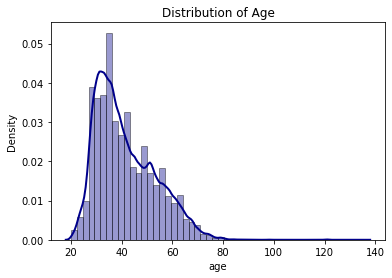

In [17]:
sns.distplot(data['age'], hist=True, kde=True, color='darkblue',
             hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})
plt.title('Distribution of Age')
plt.show()

>The distribution of age is positively skewed with mean of the age: 39 years

#### From the ridership distribution data by gender, user type, and age, we can conclude that the majority of users was 39-year male subsriber.

## What is the average number of trips per day?

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878098 entries, 0 to 1878097
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               float64
 14  gender                   int64  
 15  age                      float64
dtypes: float64(6), int64(5), object(5)
memory usage: 229.3+ MB


In [19]:
# change datatype to datetime
data['starttime'] = pd.to_datetime(data['starttime'])
data['starttime']

0         2017-09-01 00:00:17
1         2017-09-01 00:00:21
2         2017-09-01 00:00:25
3         2017-09-01 00:00:52
4         2017-09-01 00:01:01
                  ...        
1878093   2017-09-30 23:59:30
1878094   2017-09-30 23:59:33
1878095   2017-09-30 23:59:40
1878096   2017-09-30 23:59:49
1878097   2017-09-30 23:59:52
Name: starttime, Length: 1878098, dtype: datetime64[ns]

In [20]:
# group date by day
trip_day = data['starttime'].dt.floor('d').value_counts().rename_axis('date').reset_index(name='number_of_trips')
trip_day.head()

,date,number_of_trips
0,2017-09-12,74580
1,2017-09-15,72297
2,2017-09-14,72071
3,2017-09-11,71917
4,2017-09-26,71518


In [21]:
# average number of trips per day
number = trip_day['number_of_trips'].mean()
print(f'Average number of trips per day: {number:.2f}')

Average number of trips per day: 62603.27


## What is the average trip duration?

In [22]:
# trip duration in minutes
trip_duration = data['tripduration'].mean()/60
print(f'The average trip duration is {trip_duration:.2f} minutes')

The average trip duration is 16.62 minutes


## What days of the week are most rides taken on?
Process the data and plot your answer

In [23]:
#add day name of the week to trip_day dataframe based on the date
trip_day['day'] = trip_day['date'].dt.day_name()
trip_day.head()

,date,number_of_trips,day
0,2017-09-12,74580,Tuesday
1,2017-09-15,72297,Friday
2,2017-09-14,72071,Thursday
3,2017-09-11,71917,Monday
4,2017-09-26,71518,Tuesday


>Tuesday, Sep 12th is the day most rides taken on (74.580 trips)

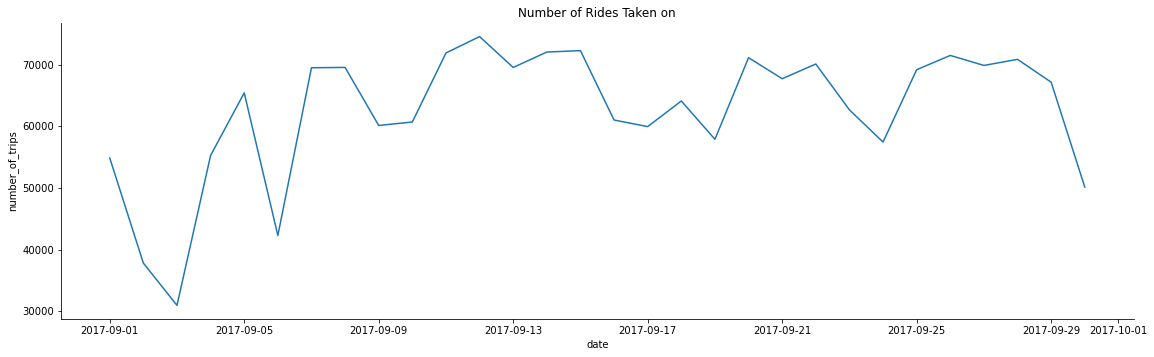

In [24]:
#sort trip_day dataframe by date
sorted_trip_day = trip_day.sort_values(by='date', ascending=True)

#plot the data on line graph
line = sns.relplot(data=sorted_trip_day, x='date', y='number_of_trips', kind='line', height=3)
line.fig.set_size_inches(25,5)
plt.title('Number of Rides Taken on')
plt.show()

## What hour of the day are most rides taken on?
Process the data and plot your answer

In [25]:
#slicing data on the day most rides taken on (Sep 12th)
sep_12 = data[(data['starttime']>='2017-09-12 00:00:00') & (data['starttime'] <= '2017-09-12 23:59:59')]
sep_12.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
618549,402,2017-09-12 00:00:04,2017-09-12 00:06:47,360,William St & Pine St,40.707179,-74.008873,276,Duane St & Greenwich St,40.717488,-74.010455,17308,Subscriber,1998.0,1,23.0
618550,654,2017-09-12 00:00:25,2017-09-12 00:11:20,312,Allen St & Stanton St,40.722055,-73.989111,195,Liberty St & Broadway,40.709056,-74.010434,28527,Subscriber,1989.0,1,32.0
618551,999,2017-09-12 00:00:28,2017-09-12 00:17:08,3383,Cathedral Pkwy & Broadway,40.804213,-73.966991,3172,W 74 St & Columbus Ave,40.778567,-73.977550,14731,Subscriber,1995.0,2,26.0
618552,338,2017-09-12 00:00:37,2017-09-12 00:06:16,415,Pearl St & Hanover Square,40.704718,-74.009260,82,St James Pl & Pearl St,40.711174,-74.000165,25492,Subscriber,1987.0,1,34.0
618553,1077,2017-09-12 00:00:46,2017-09-12 00:18:44,3156,E 72 St & York Ave,40.766638,-73.953483,450,W 49 St & 8 Ave,40.762272,-73.987882,20968,Subscriber,1991.0,1,30.0


In [26]:
#resample and group datetime by Time intervals (hour), then count each interval
tuesday = sep_12.resample('H', on='starttime').starttime.count().reset_index(name='count')
tuesday.sort_values(by='count', ascending=False).head()

,starttime,count
18,2017-09-12 18:00:00,8364
17,2017-09-12 17:00:00,8101
8,2017-09-12 08:00:00,7627
19,2017-09-12 19:00:00,5414
9,2017-09-12 09:00:00,4882


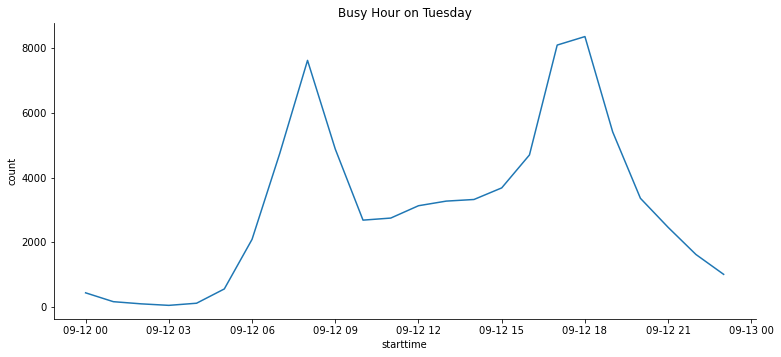

In [27]:
#plot busy our on Sep 12th
line = sns.relplot(data=tuesday, x='starttime', y='count', kind='line', height=3)
line.fig.set_size_inches(15,5)
plt.title('Busy Hour on Tuesday')
plt.show()

>Busy hour on Tuesday, Sep 12th (most rides taken on) is at 18.00 until 18.59

## Is there correlation between age and trip duration?

In [28]:
#Pearson correlation
data[['age', 'tripduration']].corr()

,age,tripduration
age,1.000000,-0.004168
tripduration,-0.004168,1.000000


> There is no correlation between age and trip duration

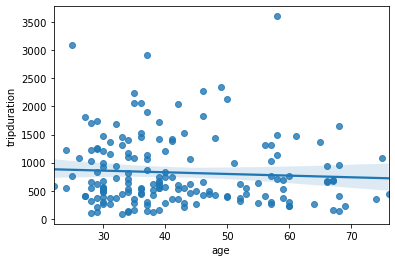

In [32]:
ax = sns.regplot(x='age', y='tripduration', data=data.sample(n=200, random_state=1))

## What are the top 10 pair of stations that our riders use as a start & stopping point?

In [33]:
# group data by start & end station and aggregate with size, then sort descending by number of trips
top10_pair = data.groupby(['start station name', 'end station name']).size().reset_index(name='number of trips')
top10_pair = top10_pair.sort_values(by='number of trips', ascending=False).head(10)
top10_pair

,start station name,end station name,number of trips
38402,Central Park S & 6 Ave,Central Park S & 6 Ave,856
4818,12 Ave & W 40 St,West St & Chambers St,781
75000,E 7 St & Avenue A,Cooper Square & E 7 St,770
38354,Central Park S & 6 Ave,5 Ave & E 88 St,701
88775,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,578
161956,West St & Chambers St,12 Ave & W 40 St,562
127788,Soissons Landing,Soissons Landing,560
118800,Picnic Point,Soissons Landing,558
119159,Pier 40 - Hudson River Park,West St & Chambers St,549
4696,12 Ave & W 40 St,Pier 40 - Hudson River Park,538


In [34]:
#add a new column for pair of stations
top10_pair['pair of stations'] = top10_pair['start station name'] + ' - ' + top10_pair['end station name']
top10_pair

,start station name,end station name,number of trips,pair of stations
38402,Central Park S & 6 Ave,Central Park S & 6 Ave,856,Central Park S & 6 Ave - Central Park S & 6 Ave
4818,12 Ave & W 40 St,West St & Chambers St,781,12 Ave & W 40 St - West St & Chambers St
75000,E 7 St & Avenue A,Cooper Square & E 7 St,770,E 7 St & Avenue A - Cooper Square & E 7 St
38354,Central Park S & 6 Ave,5 Ave & E 88 St,701,Central Park S & 6 Ave - 5 Ave & E 88 St
88775,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,578,Grand Army Plaza & Central Park S - Grand Army...
161956,West St & Chambers St,12 Ave & W 40 St,562,West St & Chambers St - 12 Ave & W 40 St
127788,Soissons Landing,Soissons Landing,560,Soissons Landing - Soissons Landing
118800,Picnic Point,Soissons Landing,558,Picnic Point - Soissons Landing
119159,Pier 40 - Hudson River Park,West St & Chambers St,549,Pier 40 - Hudson River Park - West St & Chambe...
4696,12 Ave & W 40 St,Pier 40 - Hudson River Park,538,12 Ave & W 40 St - Pier 40 - Hudson River Park


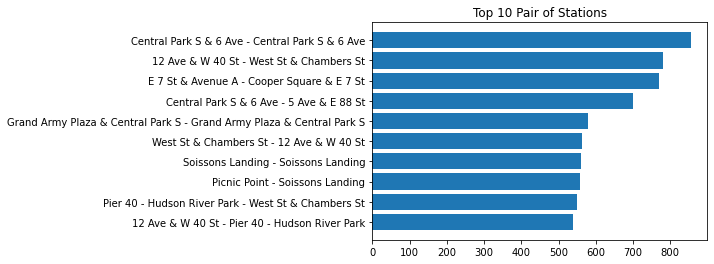

In [35]:
#sort ascending number of trips
result = top10_pair.sort_values(by='number of trips', ascending=True)

#plot using horizontal barplot
plt.barh(result['pair of stations'], result['number of trips'], align='center')
plt.title('Top 10 Pair of Stations')
plt.show()

## Come up with your own question on the Citibike data usage and formulate a hypothesis

### Example:
### "Women are less likely than men to choose biking for commuting."
>
>Null Hypothesis: 

>The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



### "The age of users is not more than 33 years old."

Null Hypothesis: People who ride citibikes are over 33 years old (μ > 33)

Alternative Hypothesis: People who ride citibikes are the same or lower than 33 years old (μ <= 33)

## Work with your dataset and show your findings to help answer your question

In [36]:
# calculate mean from the data
mean_age = data['age'].mean()
print('The average age of the user is ', mean_age)

# calculate standard deviation from the data
std_age = data['age'].std()
print('The standard deviation of user age is ', std_age)

The average age of the user is  41.465493855611356
The standard deviation of user age is  11.713266523832322


In [37]:
# random sample with n=11
list = data['age'].sample(n=10, random_state=4).to_list()
list

[34.0, 41.0, 53.0, 45.0, 39.0, 43.0, 23.0, 42.0, 59.0, 29.0]

In [38]:
# Statistics Test - t test
from scipy.stats import ttest_1samp, ttest_ind
tset, pval = ttest_1samp(list, 33)

print('p-values: ', pval)
if pval < 0.05: #alpha value is 0.05 or 5%
    print('Reject the Null Hypothesis')
else:
    print('Fail to reject the Null Hypothesis')

p-values:  0.044831599105008
Reject the Null Hypothesis


>From the results above, rejecting the null hypothesis means that the assumption that "the age of users is not more than 33 years old" is correct.

# Submit Instructions
Rename this notebook to `mod2_<first_name>_<last_name>.ipynb` and push this to your branch in module-2 repository

```
git checkout -b tanyani
git add mod2_tanya_nabila.ipynb
git commit -m 'submit mod2 assignment for Tanya Nabila'
git push
```